
#HW #9: Neural Networks with Keras

---

**Overview**

`keras` is a convenience layer over `tensorflow`.  Let's review the workflow we had yesterday in `tensorflow`:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

The "big" steps were 5 and 6.

- 5 Build the network by creating linked `dense` layers.
- 6 Iterate over epochs (and possibly batches), explicitly calling on the session to execute a "training op"

In `keras` these to steps are simplified.

- 5 Add layers to a "model".
- 6 Compile and fit the model. (as little as 2 lines of code!)

---

**Regardless of the tool that you are using**, keep in mind the following concepts:

- What will your network topology (number of hidden layers and units per layer) be?
- What activation function will you use for the hidden layers?
- Based on your model, how many units will be in your input and output layers?
- Based on your model, what will the activation function on your output layer be?
- What will your loss function be?
- What optimizer will you use for the gradient descent/backpropogation?

## Regression Model

In [0]:
!pip install -q keras

In [0]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


In [0]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [0]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd


In [0]:
data = load_diabetes()
#show the description of this data below
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [0]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Text(0, 0.5, 'Frequency')

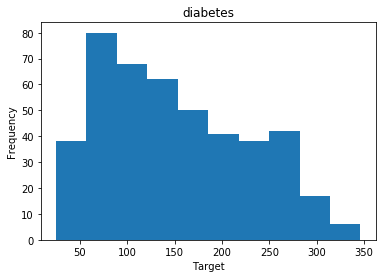

In [0]:
import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt
import numpy as np

plt.hist(data.target)
plt.title("diabetes")
plt.xlabel("Target")
plt.ylabel("Frequency")

Note that the data matrix (i.e., input features) are stored in `data.data`; the target values are stored in `data.target`.

To prepare your data...

1. Split your data into train and test sets.
2. Standardize your data.

> Note that the description indicate that these data have already been scaled.  Let's go through the motions and scale explicitly here, since you typically will _not_ have someone else scaling your data for you. 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
#Use StandardScaler to scale the input part
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
#Show the dimension of X_train
X_train.shape

(353, 10)

In [0]:
X_train.shape

(353, 10)

In [0]:
X_test.shape

(89, 10)

In [0]:
y_train.shape

(353,)

In [0]:
y_test.shape

(89,)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
#build a feedforward NN with one hidden layer
input_size =X_train.shape[1]
model.add(Dense(input_size*3, input_dim=input_size, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=10, activation="relu", kernel_initializer="uniform")`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`



In [0]:
from keras.optimizers import Adam
#compile the model with loss='mean_squared_error' and optimizer=adam
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [0]:
#Train the model with X_train, y_train and validation data as X_test, y_test
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=25, batch_size=10,  verbose=0);

## Binary Classification

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data1 = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target)


In [0]:
model = Sequential()


n_input = X_train.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden*10, input_dim=n_input, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(300, input_dim=30, activation="relu", kernel_initializer="uniform")`



**Repeat the steps (with appropirate modification )as in Regression model except use compile it with loss='binary_crossentropy' **

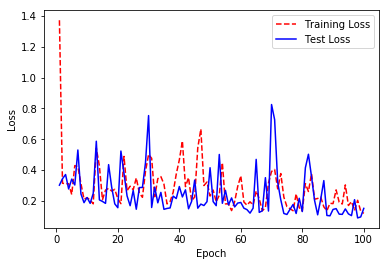

In [0]:
#Show the training and testing loss profile curves
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Train the model with X_train, y_train and validation data as X_test, y_test
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=20,  verbose=0)
#train and test curves
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


## Multi-Class Classification

In [0]:
from sklearn.datasets import load_iris
from keras.utils import to_categorical

In [0]:
data2 = load_iris()

pd.Series(data2.target).value_counts()


2    50
1    50
0    50
dtype: int64

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(data2.data, data2.target)

from keras import utils
y_train_c = utils.to_categorical(y2_train, num_classes=3)
y_test_c = utils.to_categorical(y2_test, num_classes=3)
print('original y2_train size:',y2_train.shape,'transformed y_train shape:', y_train_c.shape)

original y2_train size: (112,) transformed y_train shape: (112, 3)


In [0]:

n_input =X2_train.shape[1]
n_hidden = n_input
model2 = Sequential()
model2.add(Dense(n_hidden*10, input_dim=n_input, init='uniform', activation='relu'))
model2.add(Dense(3,  init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=4, activation="relu", kernel_initializer="uniform")`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`



**Repeat the steps (with appropirate modification )as in Regression model except use compile it with loss='categorical_crossentropy''**

In [0]:
#Plot the training and testing loss courves

In [0]:
#Show the training and testing loss profile curves
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Train the model with X_train, y_train and validation data as X_test, y_test
history = model2.fit(X2_train, y_train_c, validation_data=(X2_test, y_test_c),epochs=100, batch_size=30,  verbose=0)


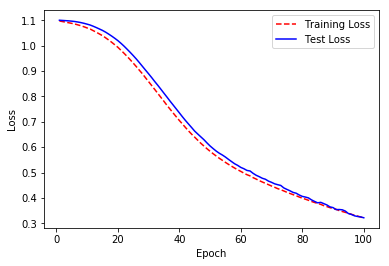

In [0]:

#train and test curves
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();
